In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns#; sns.set(color_codes=True)
import sys
sys.path.append("../libs")
from helpers import *
cut = 300
conf = 75
init_cut =  100
source = "canela"
%matplotlib inline

In [31]:
files = glob.glob("../../results/best_arimas/*"+source+"*.csv")
results = {}
for file in files:
    filetype = "_".join(os.path.basename(file).split("_")[10:]).replace(".csv", "")  
    results[filetype] = pd.read_csv(file)

# $ARIMA(1,1,0)$

/home/tronco/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


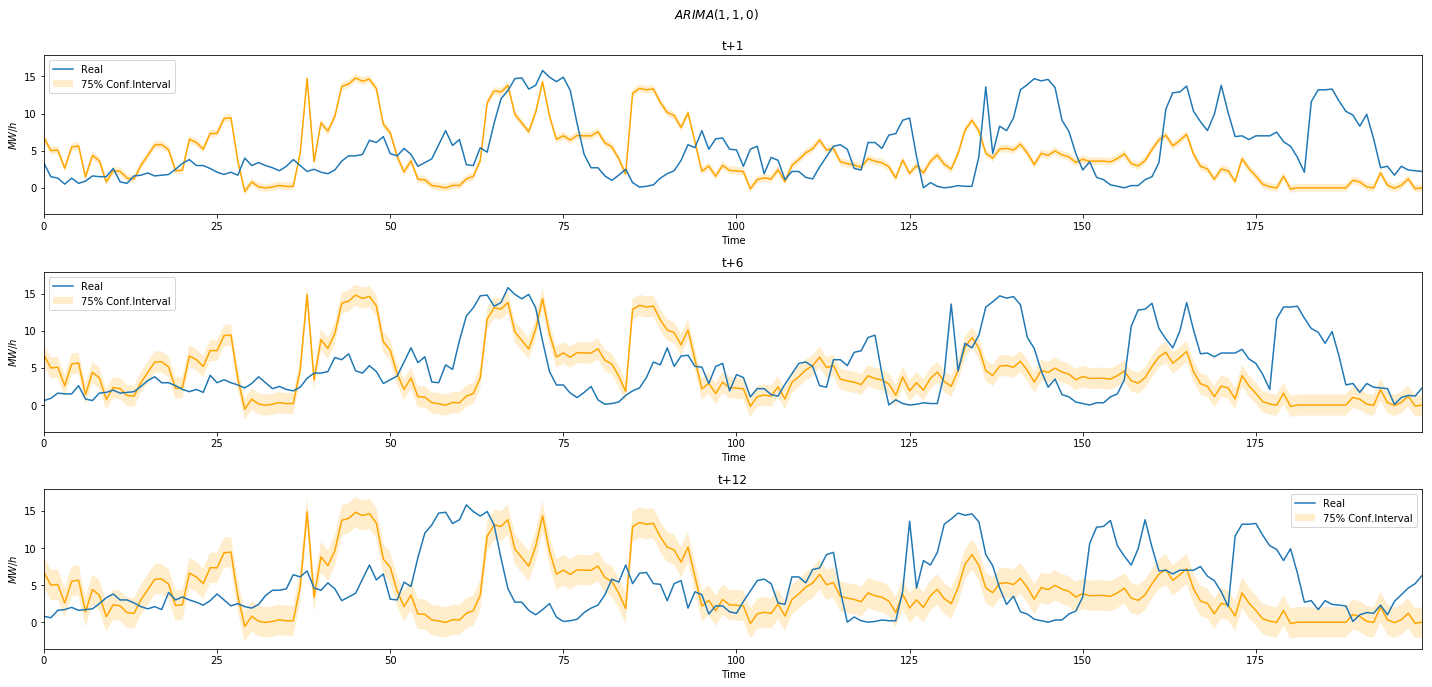

,$t+0$,$t+5$,$t+11$,$\overline{t+i}$
MAE,1.274641,2.524320,3.169138,2.466261
MSE,4.681964,14.846142,21.989282,14.836458
MeAE,0.652272,1.454195,1.972902,1.441553
MAPE,0.412150,0.815440,1.023127,0.796599
$r^2$,0.685839,0.004246,-0.474973,0.004824


In [32]:
fig, ax = plt.subplots(3,1,figsize=(20,10),sharey=True)
fig.suptitle("$ARIMA(1,1,0)$")
for j,i in enumerate([0,5,11]):
    ax[j].set_title("t+{}".format(i+1))
    data  = np.vstack([results["y_approx"].values[init_cut:cut,i],results["y_approx_{}_lo".format(conf)].values[init_cut:cut,i],
              results["y_approx_{}_hi".format(conf)].values[init_cut:cut,i]])
    sns.tsplot(data=data, ax = ax[j],color="orange")
    ax[j].plot(results["y_test"].values[:cut,i])

    ax[j].legend(["Real","{}% Conf.Interval".format(conf)])
    ax[j].set_xlabel("Time")
    ax[j].set_ylabel("$MW/h$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
display(show_errors(results["y_test"],results["y_approx"]).iloc[:,[0,5,11,12]])


# $SARIMA(2,1,2) x (1,0,1)_{12}$

In [33]:
files = glob.glob("../../results/best_sarimas/*"+source+"*.csv")
results = {}
for file in files:
    filetype = "_".join(os.path.basename(file).split("_")[10:]).replace(".csv", "")  
    results[filetype] = pd.read_csv(file)

/home/tronco/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


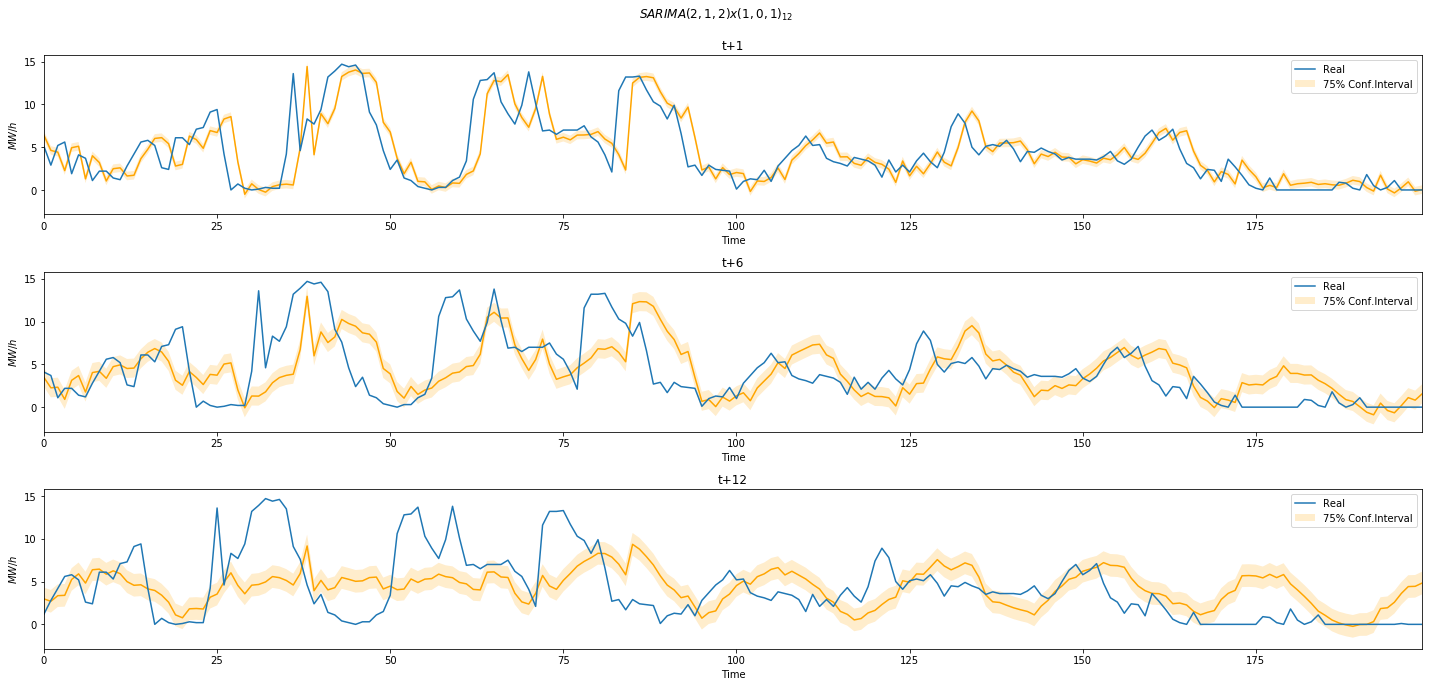

,$t+0$,$t+5$,$t+11$,$\overline{t+i}$
MAE,1.271117,2.245989,2.596592,2.160533
MSE,4.212253,9.314384,11.728879,9.007707
MeAE,0.663502,1.698783,2.097353,1.611062
MAPE,0.411011,0.725530,0.838286,0.697869
$r^2$,0.717357,0.375270,0.213263,0.395792


In [34]:
fig, ax = plt.subplots(3,1,figsize=(20,10),sharey=True)
fig.suptitle("$SARIMA(2,1,2)x(1,0,1)_{12}$")
for j,i in enumerate([0,5,11]):
    ax[j].set_title("t+{}".format(i+1))
    data  = np.vstack([results["y_approx"].values[init_cut:cut,i],results["y_approx_{}_lo".format(conf)].values[init_cut:cut,i],
              results["y_approx_{}_hi".format(conf)].values[init_cut:cut,i]])
    sns.tsplot(data=data, ax = ax[j],color="orange")
    ax[j].plot(results["y_test"].values[init_cut:cut,i])

    ax[j].legend(["Real","{}% Conf.Interval".format(conf)])
    ax[j].set_xlabel("Time")
    ax[j].set_ylabel("$MW/h$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
display(show_errors(results["y_test"],results["y_approx"]).iloc[:,[0,5,11,12]])


# Totoral

In [35]:
source = "totoral"

In [36]:
files = glob.glob("../../results/best_arimas/*"+source+"*.csv")
results = {}
for file in files:
    filetype = "_".join(os.path.basename(file).split("_")[10:]).replace(".csv", "")  
    results[filetype] = pd.read_csv(file)

# $ARIMA(0,1,1)$

/home/tronco/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


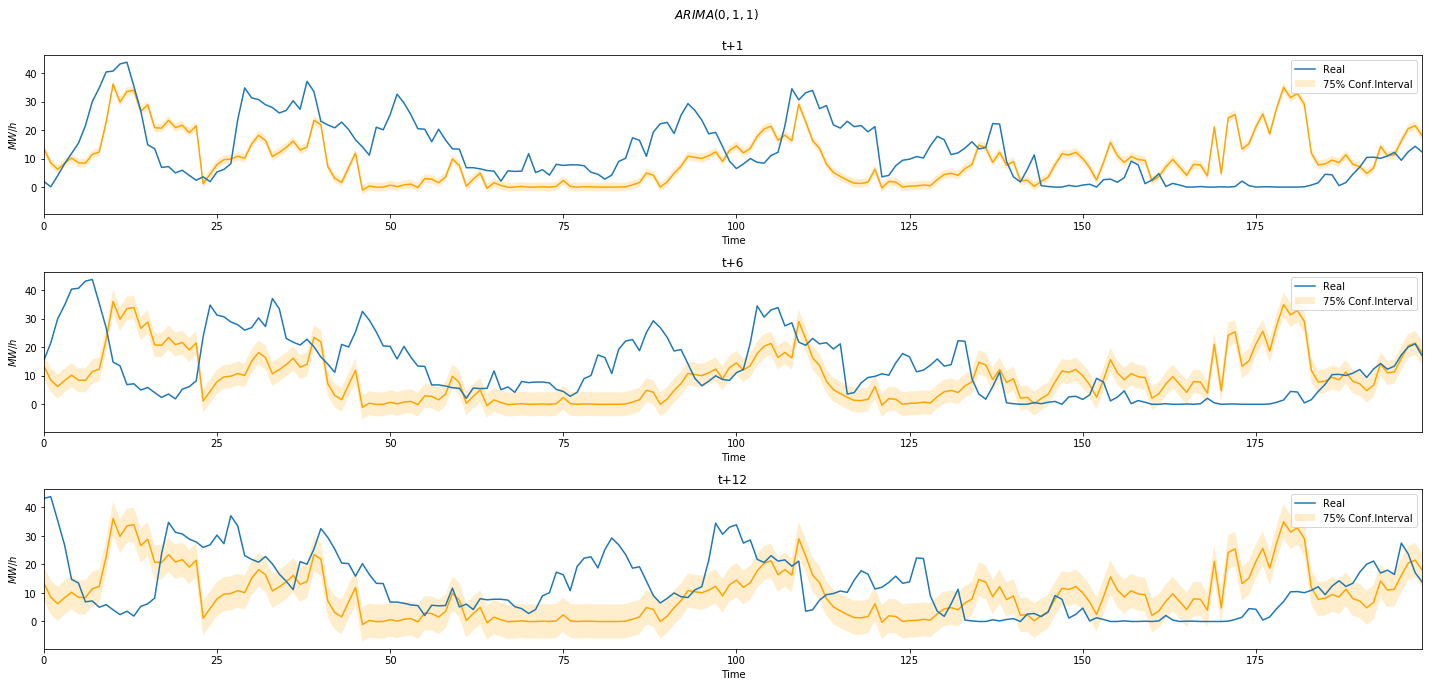

,$t+0$,$t+5$,$t+11$,$\overline{t+i}$
MAE,3.749797,7.112418,8.498250,6.866028
MSE,38.570172,112.287985,152.895536,109.209186
MeAE,1.936434,4.277195,5.499821,4.188240
MAPE,0.430990,0.815171,0.973469,0.786962
$r^2$,0.643097,-0.032525,-0.403452,-0.003506


In [37]:
fig, ax = plt.subplots(3,1,figsize=(20,10),sharey=True)
fig.suptitle("$ARIMA(0,1,1)$")
for j,i in enumerate([0,5,11]):
    ax[j].set_title("t+{}".format(i+1))
    data  = np.vstack([results["y_approx"].values[init_cut:cut,i],results["y_approx_{}_lo".format(conf)].values[init_cut:cut,i],
              results["y_approx_{}_hi".format(conf)].values[init_cut:cut,i]])
    sns.tsplot(data=data, ax = ax[j],color="orange")
    ax[j].plot(results["y_test"].values[:cut,i])

    ax[j].legend(["Real","{}% Conf.Interval".format(conf)])
    ax[j].set_xlabel("Time")
    ax[j].set_ylabel("$MW/h$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
display(show_errors(results["y_test"],results["y_approx"]).iloc[:,[0,5,11,12]])


# $S-ARIMA(3,1,1)x(1,0,1)_{12}$

In [39]:
files = glob.glob("../../results/best_sarimas/*"+source+"*.csv")
results = {}
for file in files:
    filetype = "_".join(os.path.basename(file).split("_")[10:]).replace(".csv", "")  
    results[filetype] = pd.read_csv(file)

/home/tronco/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


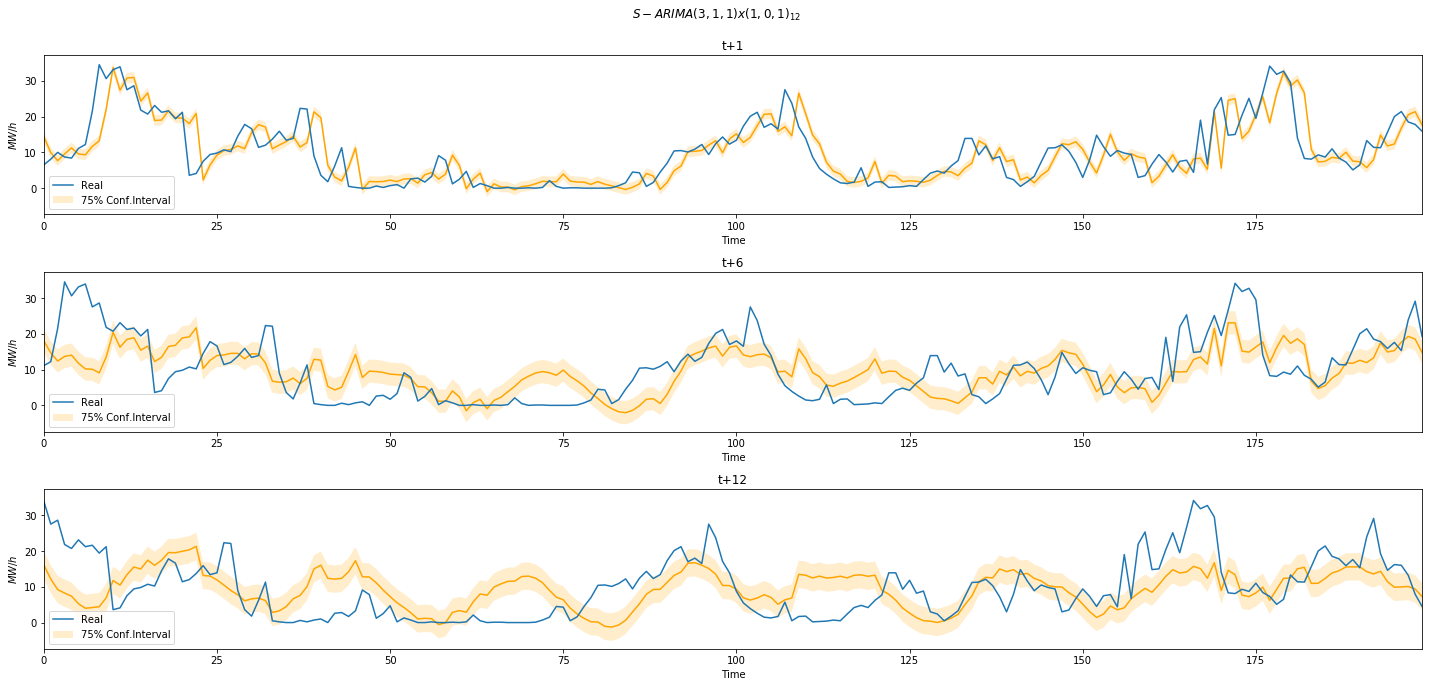

,$t+0$,$t+5$,$t+11$,$\overline{t+i}$
MAE,3.752389,6.610073,7.565491,6.346937
MSE,35.377974,77.772051,91.949626,73.763712
MeAE,1.978491,5.172148,6.587010,4.932371
MAPE,0.431288,0.757596,0.866622,0.727496
$r^2$,0.672635,0.284860,0.155980,0.321988


In [40]:
fig, ax = plt.subplots(3,1,figsize=(20,10),sharey=True)
fig.suptitle("$S-ARIMA(3,1,1)x(1,0,1)_{12}$")
for j,i in enumerate([0,5,11]):
    ax[j].set_title("t+{}".format(i+1))
    data  = np.vstack([results["y_approx"].values[init_cut:cut,i],results["y_approx_{}_lo".format(conf)].values[init_cut:cut,i],
              results["y_approx_{}_hi".format(conf)].values[init_cut:cut,i]])
    sns.tsplot(data=data, ax = ax[j],color="orange")
    ax[j].plot(results["y_test"].values[init_cut:cut,i])

    ax[j].legend(["Real","{}% Conf.Interval".format(conf)])
    ax[j].set_xlabel("Time")
    ax[j].set_ylabel("$MW/h$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
display(show_errors(results["y_test"],results["y_approx"]).iloc[:,[0,5,11,12]])


# Monte Redondo

In [41]:
source = "monte_redondo"

In [42]:
files = glob.glob("../../results/best_arimas/*"+source+"*.csv")
results = {}
for file in files:
    filetype = "_".join(os.path.basename(file).split("_")[11:]).replace(".csv", "")  
    results[filetype] = pd.read_csv(file)

# $ARIMA(0,1,1)$

/home/tronco/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


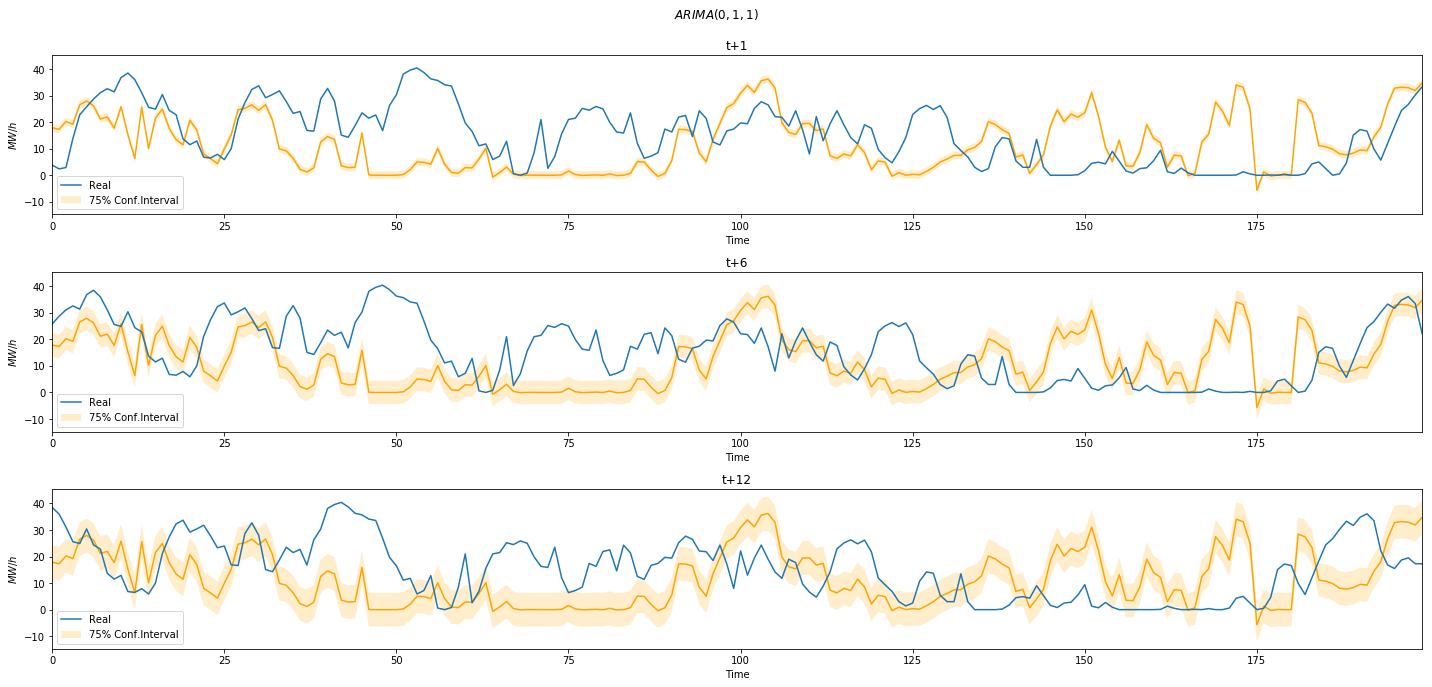

,$t+0$,$t+5$,$t+11$,$\overline{t+i}$
MAE,4.514850,8.275315,10.074479,8.075179
MSE,47.740782,139.509670,196.807085,137.510489
MeAE,2.765659,5.503779,7.053871,5.432547
MAPE,0.366328,0.670214,0.815720,0.654085
$r^2$,0.719925,0.184159,-0.150041,0.195932


In [43]:
fig, ax = plt.subplots(3,1,figsize=(20,10),sharey=True)
fig.suptitle("$ARIMA(0,1,1)$")
for j,i in enumerate([0,5,11]):
    ax[j].set_title("t+{}".format(i+1))
    data  = np.vstack([results["y_approx"].values[init_cut:cut,i],results["y_approx_{}_lo".format(conf)].values[init_cut:cut,i],
              results["y_approx_{}_hi".format(conf)].values[init_cut:cut,i]])
    sns.tsplot(data=data, ax = ax[j],color="orange")
    ax[j].plot(results["y_test"].values[:cut,i])

    ax[j].legend(["Real","{}% Conf.Interval".format(conf)])
    ax[j].set_xlabel("Time")
    ax[j].set_ylabel("$MW/h$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
display(show_errors(results["y_test"],results["y_approx"]).iloc[:,[0,5,11,12]])


# $S-ARIMA(2,1,2)x(1,0,1)_{12}$

In [28]:
files = glob.glob("../../results/best_sarimas/*"+source+"*.csv")
results = {}
for file in files:
    filetype = "_".join(os.path.basename(file).split("_")[11:]).replace(".csv", "")  
    results[filetype] = pd.read_csv(file)

/home/tronco/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


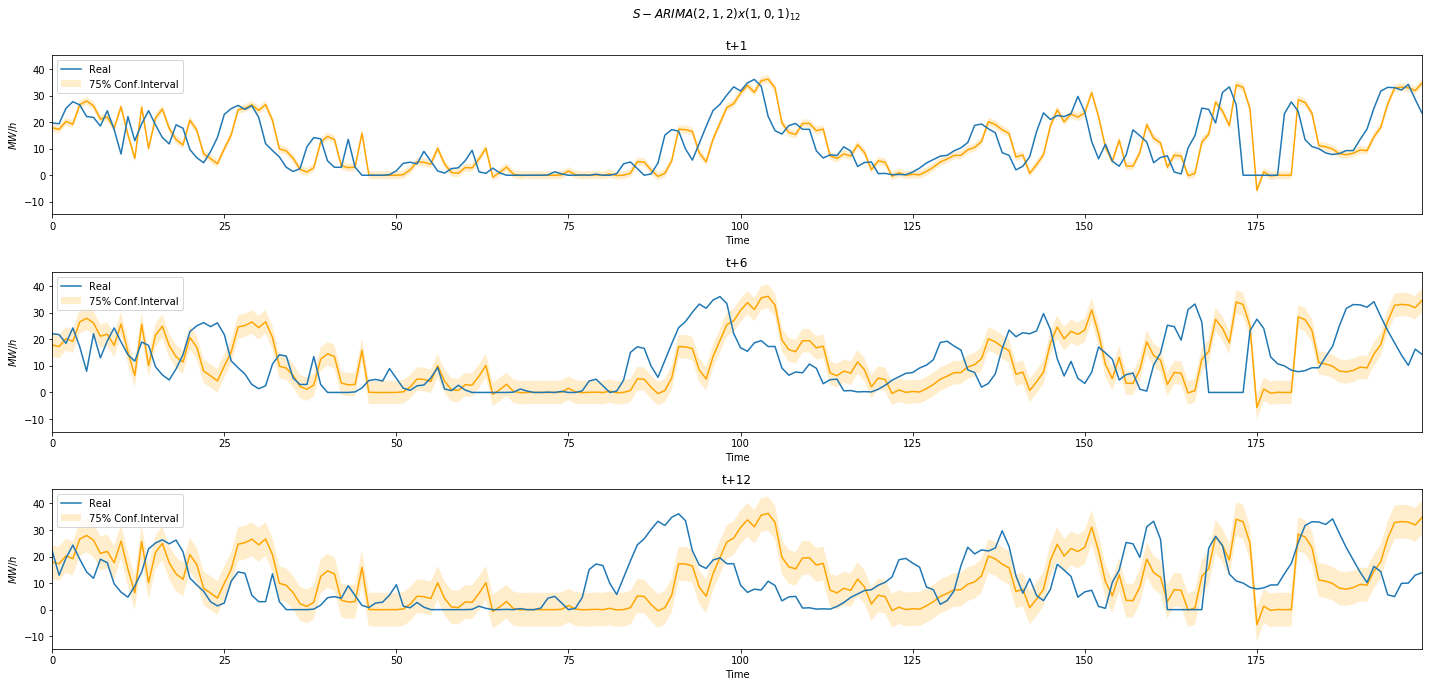

,$t+0$,$t+5$,$t+11$,$\overline{t+i}$
MAE,4.514850,8.275315,10.074479,8.075179
MSE,47.740782,139.509670,196.807085,137.510489
MeAE,2.765659,5.503779,7.053871,5.432547
MAPE,0.366328,0.670214,0.815720,0.654085
$r^2$,0.719925,0.184159,-0.150041,0.195932


In [44]:
fig, ax = plt.subplots(3,1,figsize=(20,10),sharey=True)
fig.suptitle("$S-ARIMA(2,1,2)x(1,0,1)_{12}$")
for j,i in enumerate([0,5,11]):
    ax[j].set_title("t+{}".format(i+1))
    data  = np.vstack([results["y_approx"].values[init_cut:cut,i],results["y_approx_{}_lo".format(conf)].values[init_cut:cut,i],
              results["y_approx_{}_hi".format(conf)].values[init_cut:cut,i]])
    sns.tsplot(data=data, ax = ax[j],color="orange")
    ax[j].plot(results["y_test"].values[init_cut:cut,i])

    ax[j].legend(["Real","{}% Conf.Interval".format(conf)])
    ax[j].set_xlabel("Time")
    ax[j].set_ylabel("$MW/h$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
display(show_errors(results["y_test"],results["y_approx"]).iloc[:,[0,5,11,12]])
